In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/MyDrive/")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/MyDrive/


In [90]:
#horse_df = pd.read_parquet("/content/MyDrive/MyDrive/horse/data/dev/2023/horse_info_cleaned_all.parquet")
#race_df = pd.read_parquet("/content/MyDrive/MyDrive/horse/data/dev/2023/race_info_cleaned_all.parquet")

horse_df = pd.read_parquet("/content/MyDrive/MyDrive/horse/data/dev/horse_race_info_cleaned_all2.parquet")

# Variables

In [91]:
horse_df["place"] = horse_df["place"].astype(str)
horse_df["race_id"] = horse_df["race_id"].astype(str)
horse_df["course_len"] = horse_df["course_len"].astype(str)
horse_df["month"] = horse_df["month_x"].astype(str)

In [92]:
count_df = horse_df.groupby(["race_date", "place", "race_id"]).size().reset_index()
count_df.columns = ["race_date", "place", "race_id", "count"]

horse_df = pd.merge(horse_df, count_df, how = "left", on = ["race_date", "place", "race_id"])

In [93]:
horse_df2 = pd.concat([horse_df, pd.get_dummies(horse_df[["race_id", "place", "month", "course_len", "sex_en", "course_type_en", "course_dir_en", "dirt_status_en", "weather_en"]])], axis = 1)

# XGBoost

In [10]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn import metrics

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [58]:
y_var = ["order_top_1"]
X_var = ["count",'month_1', 'month_10', 'month_11', 'month_12', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'age', 'frame_id', 'horse_id',  'kinryo_weight',  'horse_weight_today',
       'horse_weight_diff','horse_interval',
       'horse_place_interval', 'horse_dir_interval', 'horse_len_interval',
       'jockey_interval', 'horse_jockey_interval', 'h_avg_mid_1',
       'h_avg_mid_2', 'h_avg_final_3', 'h_avg_final_6', 'h_prev_final_1',
       'h_prev_mid_1', 'h_prev_mid_2', 'j_avg_mid_1', 'j_avg_mid_2',
       'j_avg_final_3', 'j_avg_final_6', 'j_prev_final_1', 'j_prev_mid_1',
       'j_prev_mid_2', 'race_id_1', 'race_id_10', 'race_id_11', 'race_id_12',
       'race_id_2', 'race_id_3', 'race_id_4', 'race_id_5', 'race_id_6',
       'race_id_7', 'race_id_8', 'race_id_9', 'place_30', 'place_35',
       'place_36', 'place_42', 'place_43', 'place_44', 'place_45', 'place_46',
       'place_47', 'place_48', 'course_len_1230.0', 'course_len_1300.0', 'course_len_1400.0',
       'course_len_1500.0', 'course_len_1600.0', 'course_len_1650.0',
       'course_len_1700.0', 'course_len_1750.0', 'course_len_1800.0',
       'course_len_1860.0', 'course_len_1870.0', 'course_len_1900.0',
       'course_len_2000.0', 'course_len_2100.0', 'course_len_2200.0',
       'course_len_2400.0', 'course_len_2500.0', 'course_len_2600.0',
       'course_len_800.0', 'course_len_900.0', 'course_len_920.0','sex_en_female', 'sex_en_male',
       'sex_en_neutering_male', 'course_type_en_dirt', 'course_type_en_grass',
       'course_dir_en_left', 'course_dir_en_right', 'dirt_status_en_bad',
       'dirt_status_en_good', 'dirt_status_en_heavy',
       'dirt_status_en_little_heavy', 'weather_en_cloudy',
       'weather_en_little_rainy', 'weather_en_little_snowy',
       'weather_en_rainy', 'weather_en_snowy', 'weather_en_sunny']

horse_df3 = horse_df3.dropna()
train_df, test_df = train_test_split(horse_df3, test_size = 0.2, shuffle = False)

In [ ]:
y_var = ["order_top_1"]
X_var = ["count",'month_1', 'month_10', 'month_11', 'month_12', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'age', 'frame_id', 'horse_id',  'kinryo_weight',  'horse_weight_today',
       'horse_weight_diff','horse_interval',
       'horse_place_interval', 'horse_dir_interval', 'horse_len_interval',
       'jockey_interval', 'horse_jockey_interval', 'h_avg_mid_1',
       'h_avg_mid_2', 'h_avg_final_3', 'h_avg_final_6', 'h_prev_final_1',
       'h_prev_mid_1', 'h_prev_mid_2', 'j_avg_mid_1', 'j_avg_mid_2',
       'j_avg_final_3', 'j_avg_final_6', 'j_prev_final_1', 'j_prev_mid_1',
       'j_prev_mid_2', 'race_id_1', 'race_id_10', 'race_id_11', 'race_id_12',
       'race_id_2', 'race_id_3', 'race_id_4', 'race_id_5', 'race_id_6',
       'race_id_7', 'race_id_8', 'race_id_9', 'course_len_1230.0', 'course_len_1300.0', 'course_len_1400.0',
       'course_len_1500.0', 'course_len_1600.0', 'course_len_1650.0',
       'course_len_1700.0', 'course_len_1750.0', 'course_len_1800.0',
       'course_len_1860.0', 'course_len_1870.0', 'course_len_1900.0',
       'course_len_2000.0', 'course_len_2100.0', 'course_len_2200.0',
       'course_len_2400.0', 'course_len_2500.0', 'course_len_2600.0',
       'course_len_800.0', 'course_len_900.0', 'course_len_920.0','sex_en_female', 'sex_en_male',
       'sex_en_neutering_male', 'course_type_en_dirt', 'course_type_en_grass',
       'course_dir_en_left', 'course_dir_en_right', 'dirt_status_en_bad',
       'dirt_status_en_good', 'dirt_status_en_heavy',
       'dirt_status_en_little_heavy', 'weather_en_cloudy',
       'weather_en_little_rainy', 'weather_en_little_snowy',
       'weather_en_rainy', 'weather_en_snowy', 'weather_en_sunny']

horse_df3 = horse_df3.dropna()
train_df, test_df = train_test_split(horse_df3, test_size = 0.2, shuffle = False)

In [ ]:
class Model():
  def __init__(self, all_df, X_var, y_var, place):
    self.X_var = X_var
    self.y_var = y_var
    self.place = place
    self.all_df = all_df
    self.es_rounds = 10

  def split_df(self):
    place_df = self.all_df[self.all_df["place_name_en"] == self.place]
    train_race_df = place_df["race_date"].drop_duplicates().head(int(len(place_df["race_date"].drop_duplicates())*0.8))
    train_df = place_df[(place_df["race_date"].isin(train_race_df))]
    test_df = place_df[~(place_df["race_date"].isin(train_race_df))]
    return train_df, test_df

  def create_model(self):
    model = XGBClassifier(early_stopping_rounds=self.es_rounds)

    X_train = train_df[self.X_var].values
    X_test = test_df[self.X_var].values
    y_train = train_df[self.y_var].values
    y_test = test_df[self.y_var].values

    eval_set = [(X_test, y_test)]
    model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

    return model

  def evalua

In [139]:
def split_df(all_df, place):
  place_df = all_df[all_df["place_name_en"] == place]
  train_race_df = place_df["race_date"].drop_duplicates().head(int(len(place_df["race_date"].drop_duplicates())*0.8))
  train_df = place_df[(place_df["race_date"].isin(train_race_df))]
  test_df = place_df[~(place_df["race_date"].isin(train_race_df))]
  return train_df, test_df


def create_model(train_df, test_df, X_var, y_var):
  model = XGBClassifier(early_stopping_rounds=10)

  X_train = train_df[X_var].values
  X_test = test_df[X_var].values
  y_train = train_df[y_var].values
  y_test = test_df[y_var].values

  eval_set = [(X_test, y_test)]
  model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

  return model

def evaluate_model(model, place, X_var, y_var):
  imp_df = pd.DataFrame([X_var, model.feature_importances_]).T
  imp_df.columns = ["var", "importance"]
  imp_df = imp_df.sort_values(by = "importance", ascending = True)
  imp_df = imp_df[imp_df["importance"] > 0]

  fig, ax = plt.subplots(figsize = (12, 12))
  ax.barh(imp_df["var"], imp_df["importance"])
  ax.set_title("{} {}".format(y_var, place))
  ax.grid()
  fig.savefig("/content/MyDrive/MyDrive/horse/fig/xgboost_feature_importance/fi_{}_{}.png".format(y_var, place))

In [89]:
train_df.columns

Index(['race_date', 'year_x', 'month_x', 'day_x', 'place', 'race_id', 'sex_en',
       'age', 'frame_id', 'umaban_id', 'horse_name', 'kinryo_weight', 'jockey',
       'arrival_diff', 'tansho', 'popularity', 'trainer', 'horse_id',
       'jockey_id', 'horse_weight_today', 'horse_weight_diff', 'mid_order_1',
       'mid_order_2', 'mid_order_3', 'mid_order_4', 'arrival_time3',
       'arrival_order', 'year_y', 'month_y', 'day_y', 'race_name',
       'course_type', 'course_dir', 'course_len', 'weather', 'dirt_status',
       'race_info', 'race_info2', 'horse_count', 'course_type_en',
       'course_dir_en', 'weather_en', 'dirt_status_en', 'order_top_1',
       'order_top_2', 'order_top_3', 'place_id', 'place_name_jpn',
       'place_name_en', 'horse_interval', 'horse_place_interval',
       'horse_dir_interval', 'horse_len_interval', 'jockey_interval',
       'horse_jockey_interval', 'h_avg_mid_1', 'h_avg_mid_2', 'h_avg_final_3',
       'h_avg_final_6', 'h_prev_final_1', 'h_prev_mid_1', 'h

In [94]:
y_var = "order_top_1"

X_var = ["count",'month_1', 'month_10', 'month_11', 'month_12', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'age', 'frame_id', 'horse_id',  'kinryo_weight',  'horse_weight_today',
       'horse_weight_diff','horse_interval',
       'horse_place_interval', 'horse_dir_interval', 'horse_len_interval',
       'jockey_interval', 'horse_jockey_interval', 'h_avg_mid_1',
       'h_avg_mid_2', 'h_avg_final_3', 'h_avg_final_6', 'h_prev_final_1',
       'h_prev_mid_1', 'h_prev_mid_2', 'j_avg_mid_1', 'j_avg_mid_2',
       'j_avg_final_3', 'j_avg_final_6', 'j_prev_final_1', 'j_prev_mid_1',
       'j_prev_mid_2', 'race_id_1', 'race_id_10', 'race_id_11', 'race_id_12',
       'race_id_2', 'race_id_3', 'race_id_4', 'race_id_5', 'race_id_6',
       'race_id_7', 'race_id_8', 'race_id_9', 'course_len_1230.0', 'course_len_1300.0', 'course_len_1400.0',
       'course_len_1500.0', 'course_len_1600.0', 'course_len_1650.0',
       'course_len_1700.0', 'course_len_1750.0', 'course_len_1800.0',
       'course_len_1860.0', 'course_len_1870.0', 'course_len_1900.0',
       'course_len_2000.0', 'course_len_2100.0', 'course_len_2200.0',
       'course_len_2400.0', 'course_len_2500.0', 'course_len_2600.0',
       'course_len_800.0', 'course_len_900.0', 'course_len_920.0','sex_en_female', 'sex_en_male',
       'sex_en_neutering_male', 'course_type_en_dirt', 'course_type_en_grass',
       'course_dir_en_left', 'course_dir_en_right', 'dirt_status_en_bad',
       'dirt_status_en_good', 'dirt_status_en_heavy',
       'dirt_status_en_little_heavy', 'weather_en_cloudy',
       'weather_en_little_rainy', 'weather_en_little_snowy',
       'weather_en_rainy', 'weather_en_snowy', 'weather_en_sunny']

train_df, test_df = split_df(horse_df2, "Oi")
model_place = create_model(train_df, test_df, X_var, y_var)

[0]	validation_0-logloss:0.30063
[1]	validation_0-logloss:0.29122
[2]	validation_0-logloss:0.28502
[3]	validation_0-logloss:0.28074
[4]	validation_0-logloss:0.27850
[5]	validation_0-logloss:0.27611
[6]	validation_0-logloss:0.27469
[7]	validation_0-logloss:0.27355
[8]	validation_0-logloss:0.27283
[9]	validation_0-logloss:0.27283
[10]	validation_0-logloss:0.27254
[11]	validation_0-logloss:0.27225
[12]	validation_0-logloss:0.27368
[13]	validation_0-logloss:0.27349
[14]	validation_0-logloss:0.27365
[15]	validation_0-logloss:0.27335
[16]	validation_0-logloss:0.27355
[17]	validation_0-logloss:0.27377
[18]	validation_0-logloss:0.27363
[19]	validation_0-logloss:0.27395
[20]	validation_0-logloss:0.27461


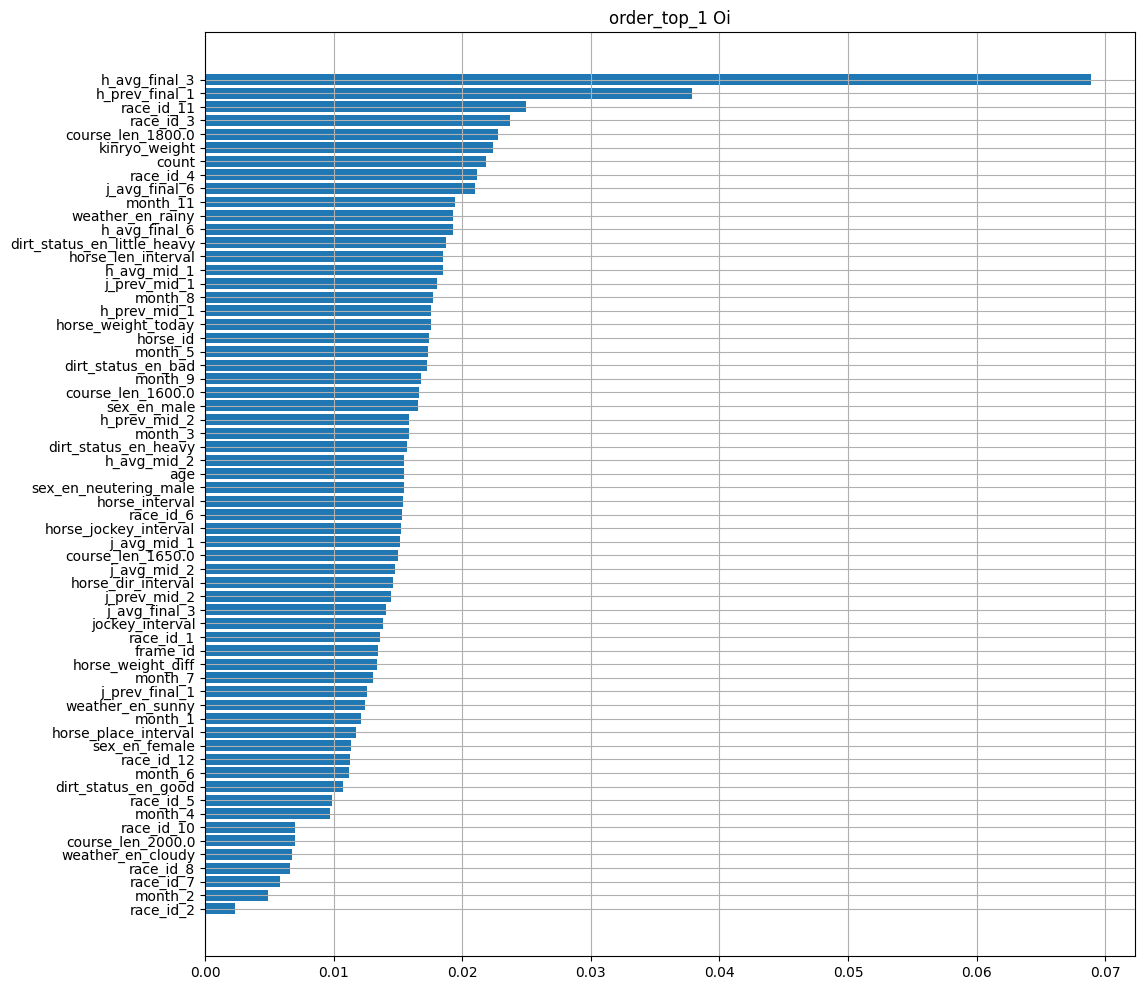

In [103]:
evaluate_model(model_place, place, X_var, y_var)

In [78]:
imp_df = pd.DataFrame([X_var, model.feature_importances_]).T
imp_df.columns = ["var", "importance"]
imp_df = imp_df.sort_values(by = "importance", ascending = True)
imp_df = imp_df[imp_df["importance"] > 0]

fig, ax = plt.subplots(figsize = (9, 9))
ax.barh(imp_df["var"], imp_df["importance"])
ax.set_title("Oi")
ax.grid()
fig.save("/content/MyDrive/MyDrive/horse/fig/xgboost_feature_importance/fi_{}.png".format(place))

In [181]:
y_pred_score = model.predict_proba(X_test)
y_pred_class = model.predict(X_test)

result_df = pd.DataFrame(y_pred_score, columns = ["score_0", "score_1"])
result_df["y_true"] = y_test
result_df["y_pred_class"] = y_pred_class
result_df["tansho_odds"] = test_df["tansho"].reset_index(drop = True)
result_df["race_date"] = test_df["race_date"].reset_index(drop = True)
result_df["race_id"] = test_df["race_id"].reset_index(drop = True)
result_df["place_name_en"] = test_df["place_name_en"].reset_index(drop = True)
result_df["arrival_order"] = test_df["arrival_order"].reset_index(drop = True)
result_df["arrival_time"] = test_df["arrival_time3"].reset_index(drop = True)
result_df["pred_score_order"] = result_df.groupby(["race_date", "race_id", "place_name_en"])["score_1"].rank(ascending=False, method = "min")

ValueError: Feature shape mismatch, expected: 99, got 89

In [112]:
y_test

247850    1
247851    0
247852    0
247853    0
247854    0
         ..
307526    0
307527    0
307528    0
307529    0
307530    0
Name: order_top_1, Length: 3031, dtype: int64

Kawasaki
---threshold---
confusion matrix = 
 [[3694    5]
 [ 376    2]]
accuracy =  0.9065489330389993
precision =  0.2857142857142857
recall =  0.005291005291005291
f1 score =  0.01038961038961039
---top in race---
Expected Profit per Race: -1.5575177826833455
confusion matrix = 
 [[3417  282]
 [ 282   96]]
accuracy =  0.8616629874908021
precision =  0.25396825396825395
recall =  0.25396825396825395
f1 score =  0.25396825396825395
Nagoya
---threshold---
confusion matrix = 
 [[8202   12]
 [ 796   13]]
accuracy =  0.9104510694890835
precision =  0.52
recall =  0.016069221260815822
f1 score =  0.03117505995203837
---top in race---
Expected Profit per Race: -2.4858694447522995
confusion matrix = 
 [[7649  565]
 [ 566  243]]
accuracy =  0.874653662861576
precision =  0.30074257425742573
recall =  0.3003708281829419
f1 score =  0.30055658627087195
Kochi
---threshold---
confusion matrix = 
 [[6734   34]
 [ 683   50]]
accuracy =  0.9044127449673377
precision =  0.5952380952380952
recall =  0

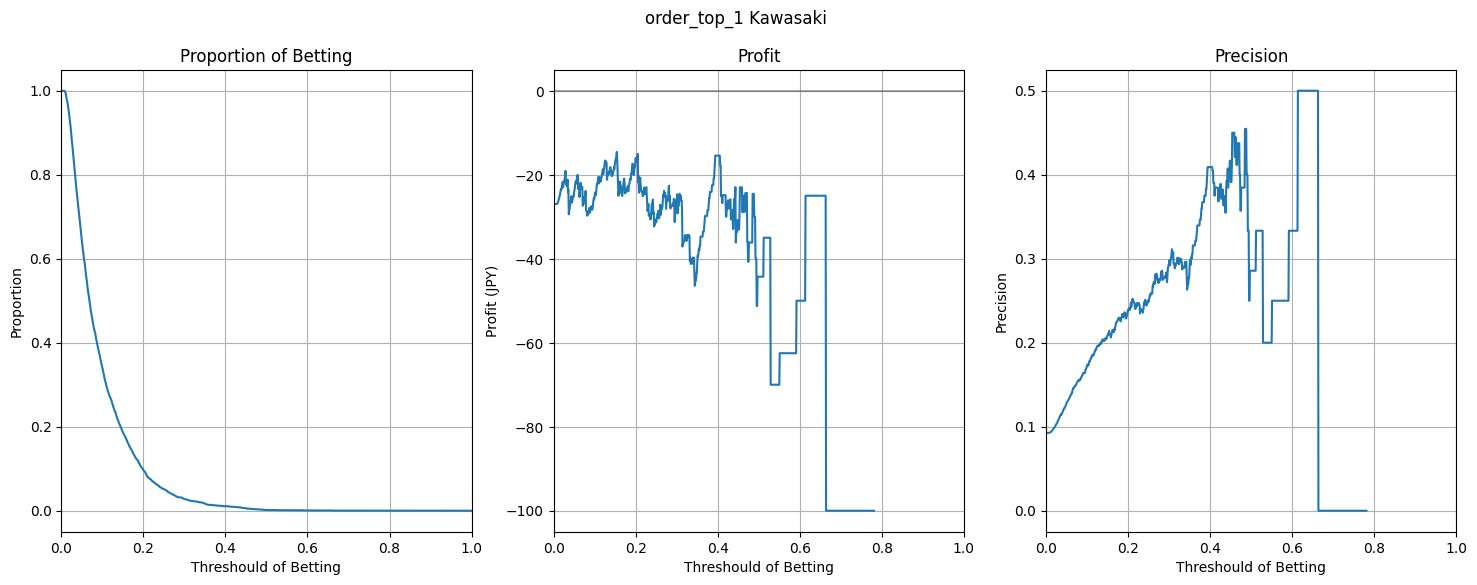

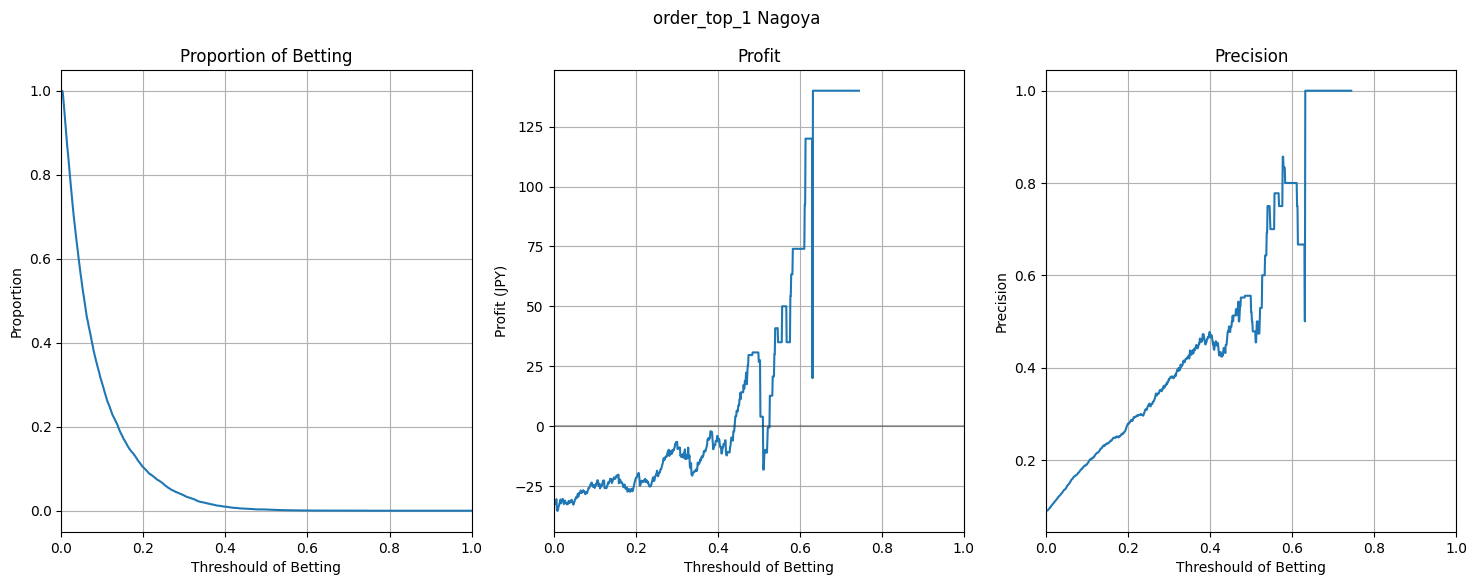

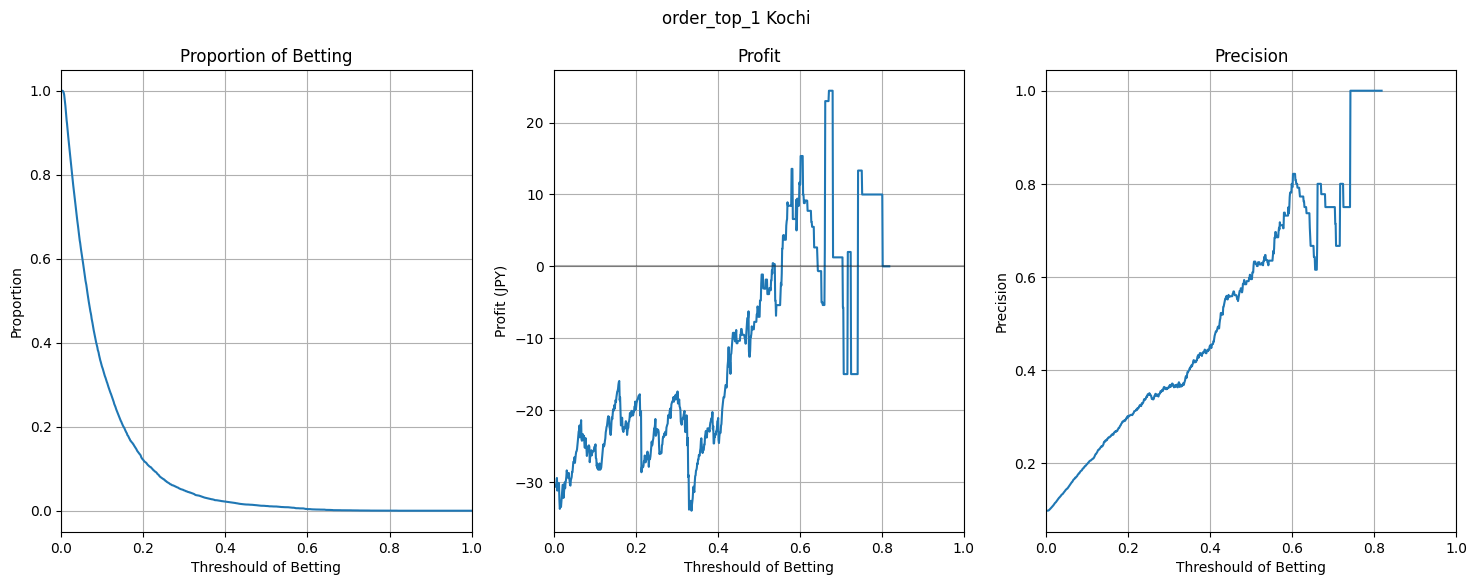

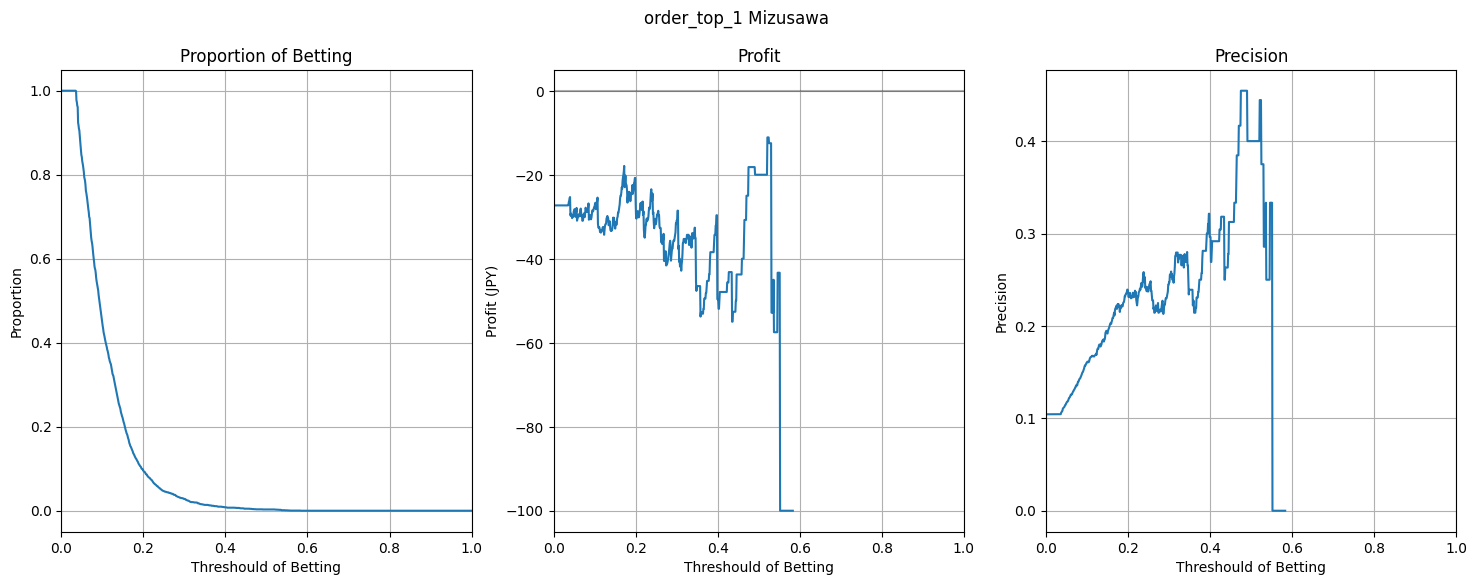

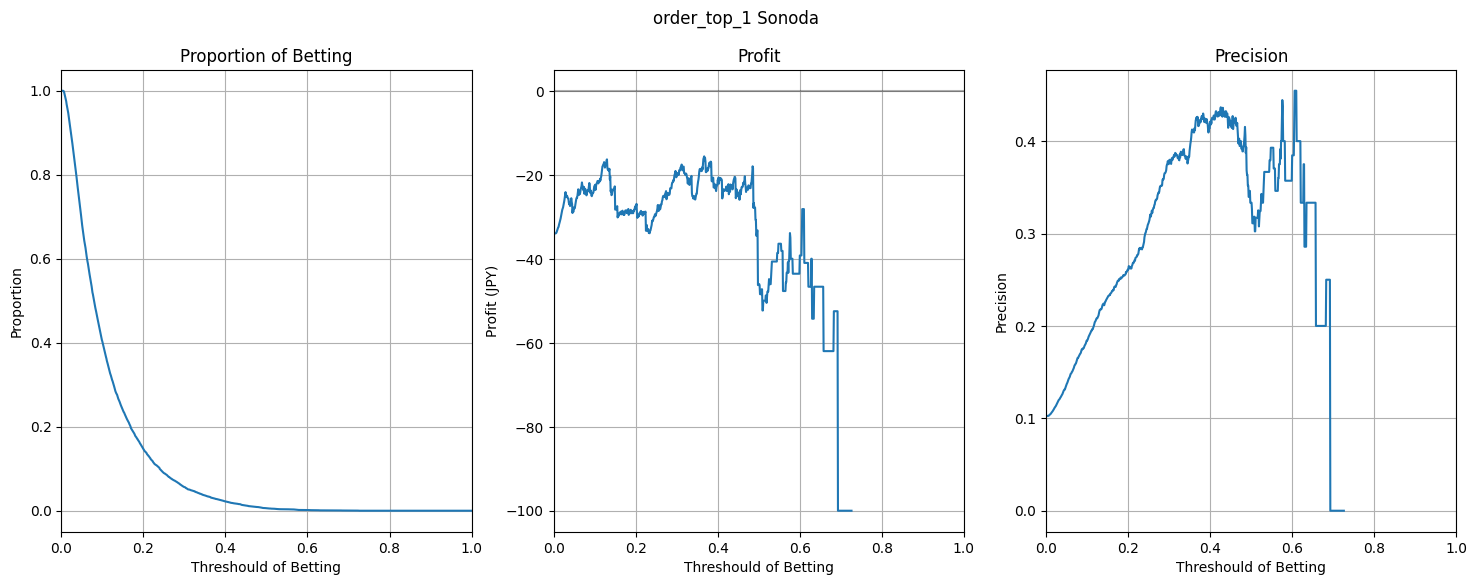

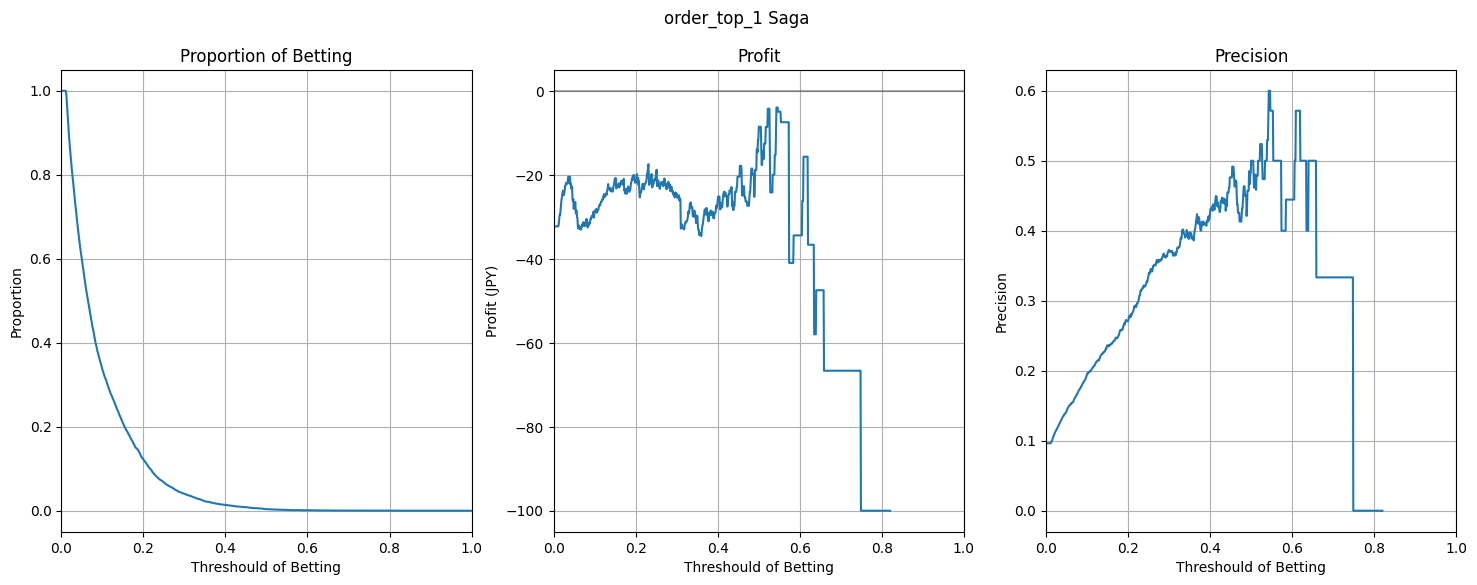

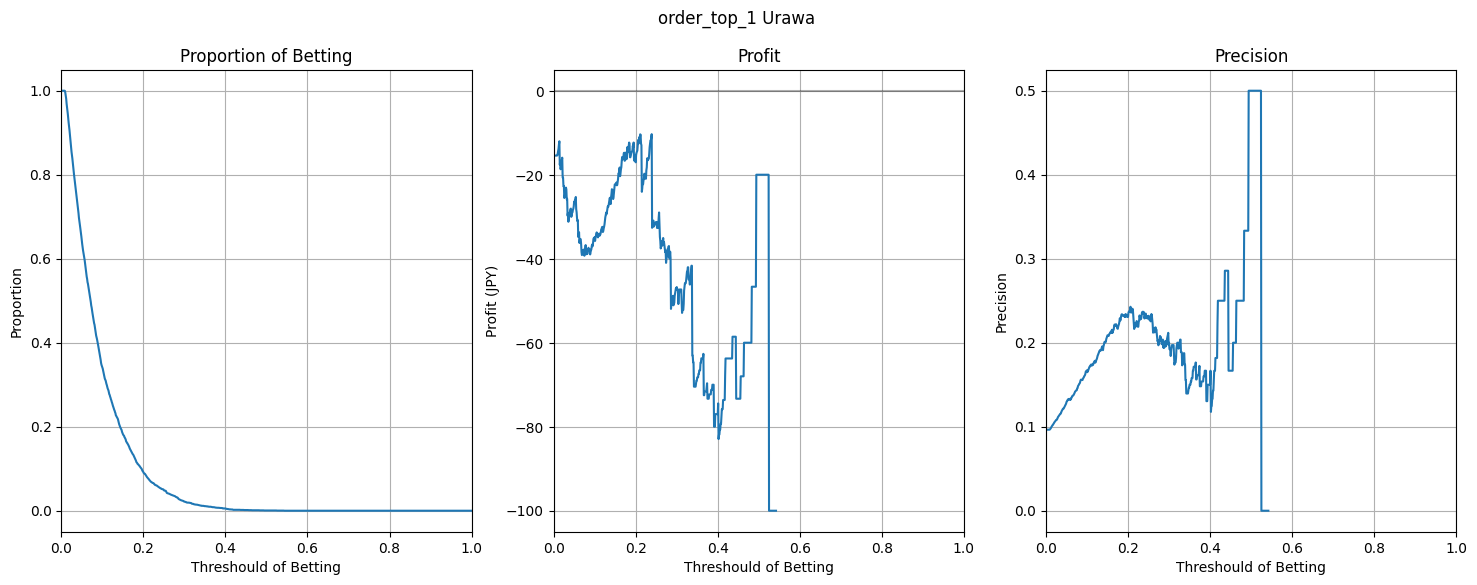

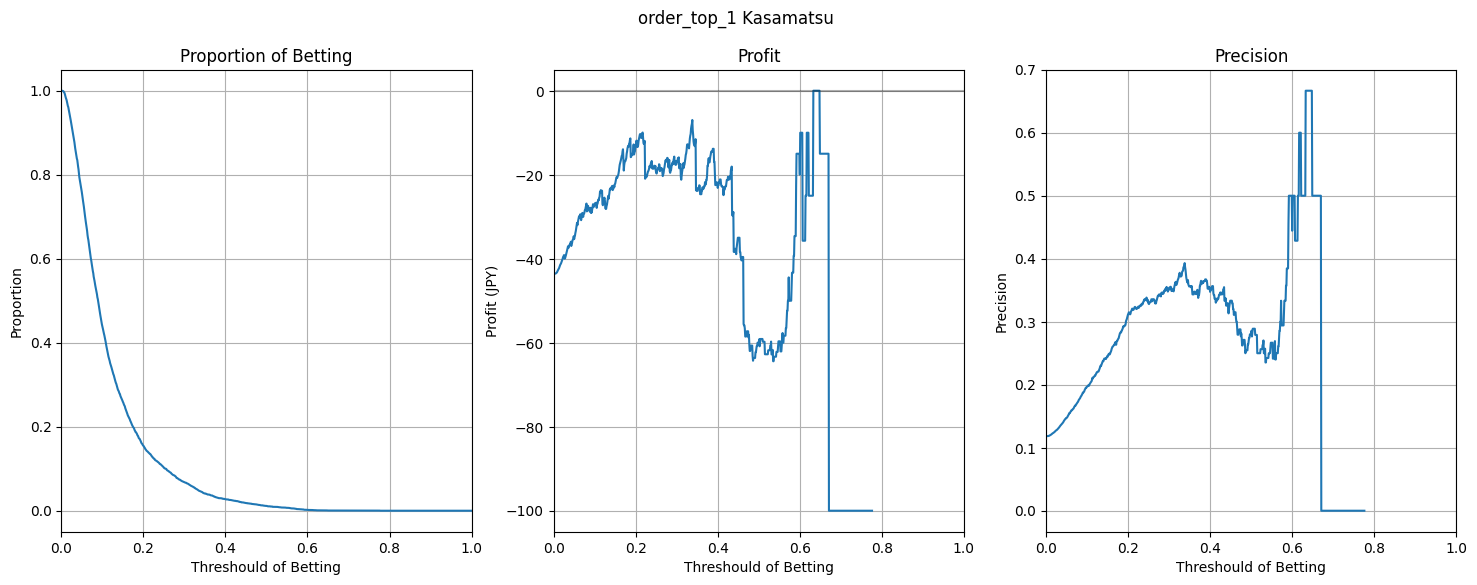

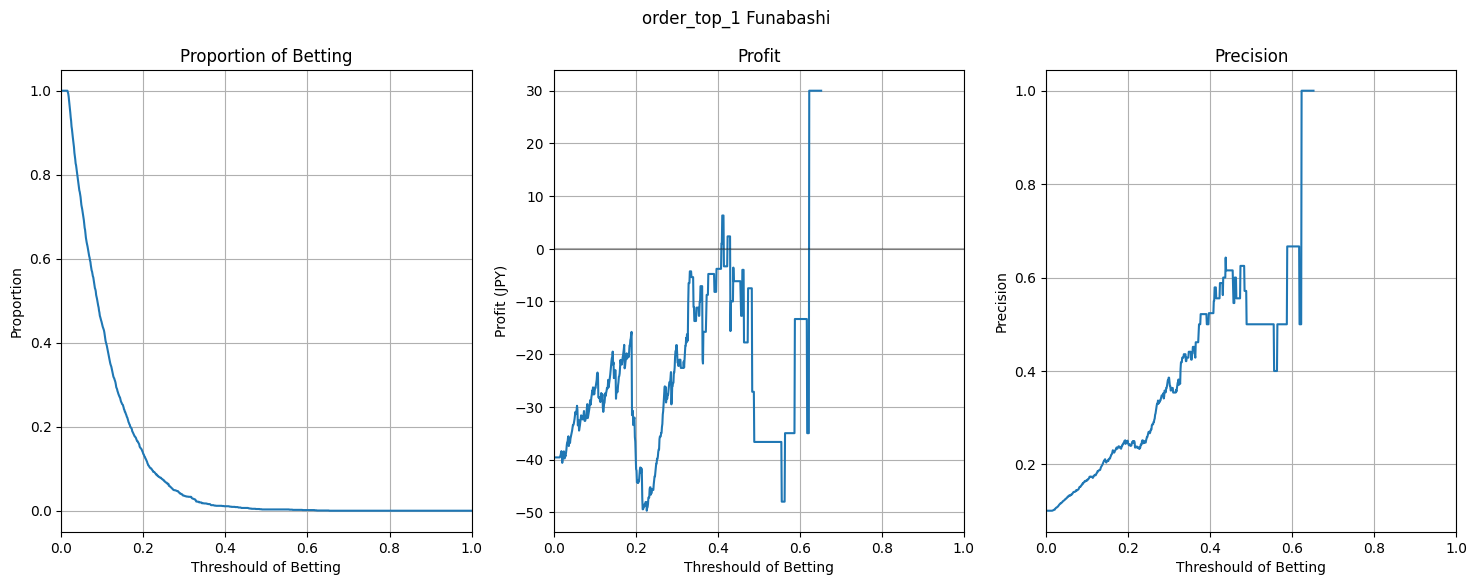

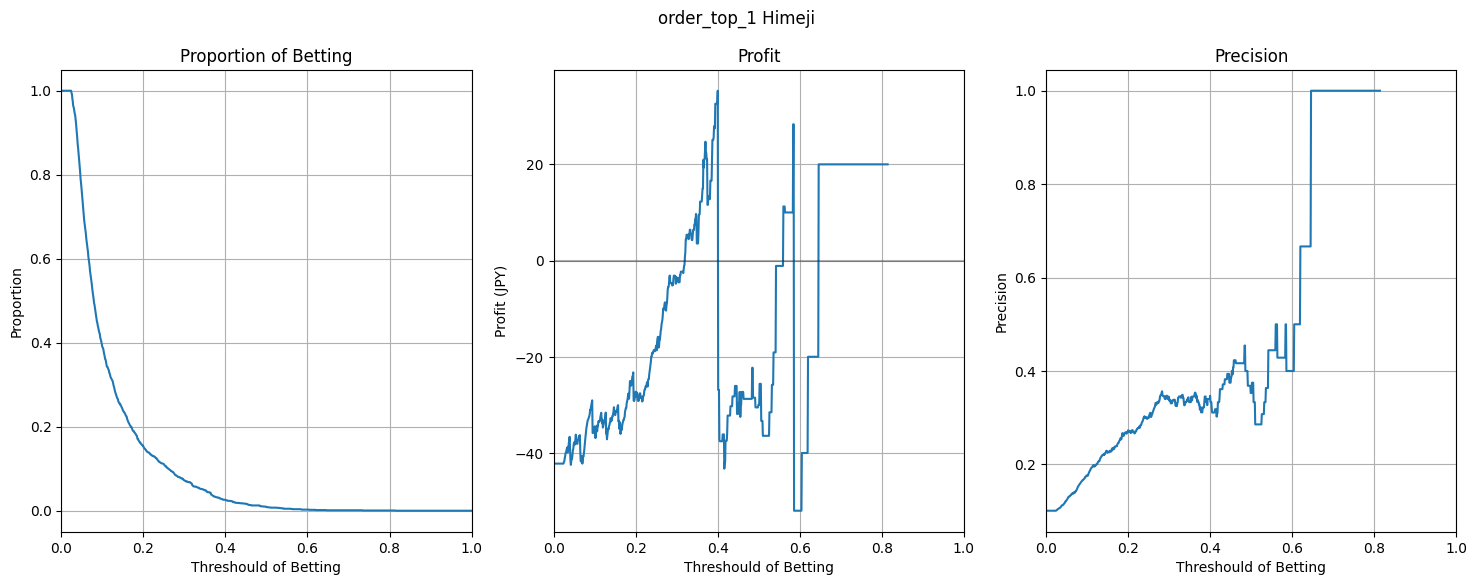

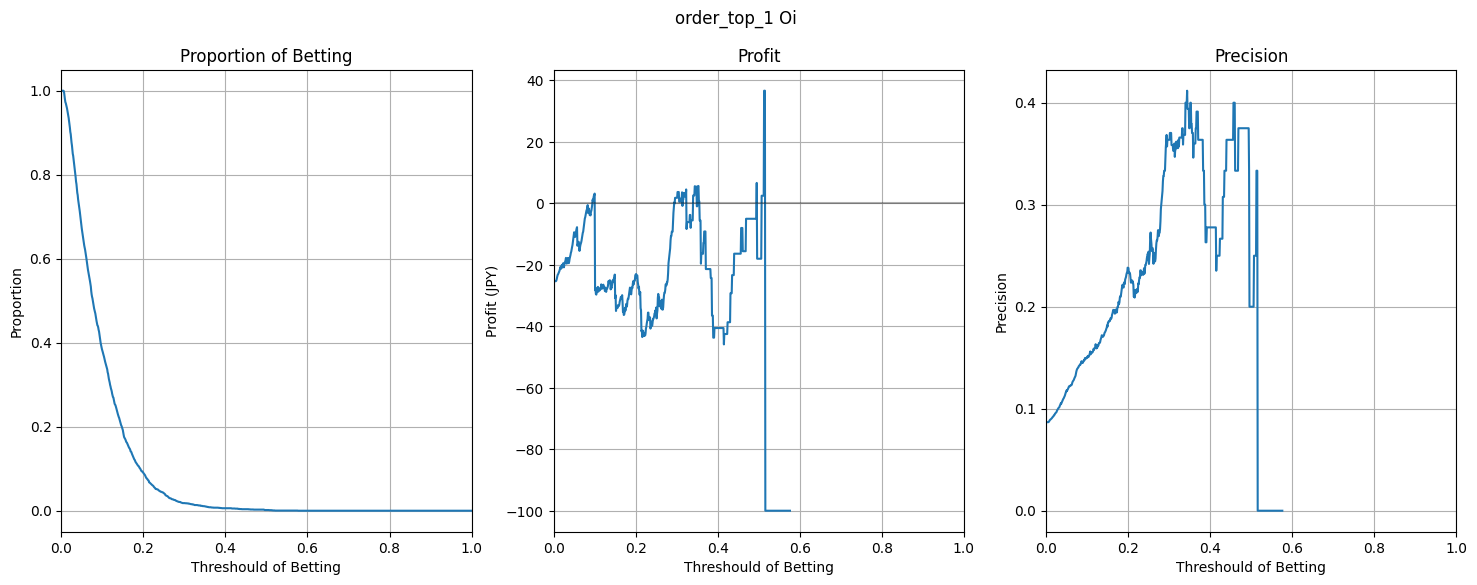

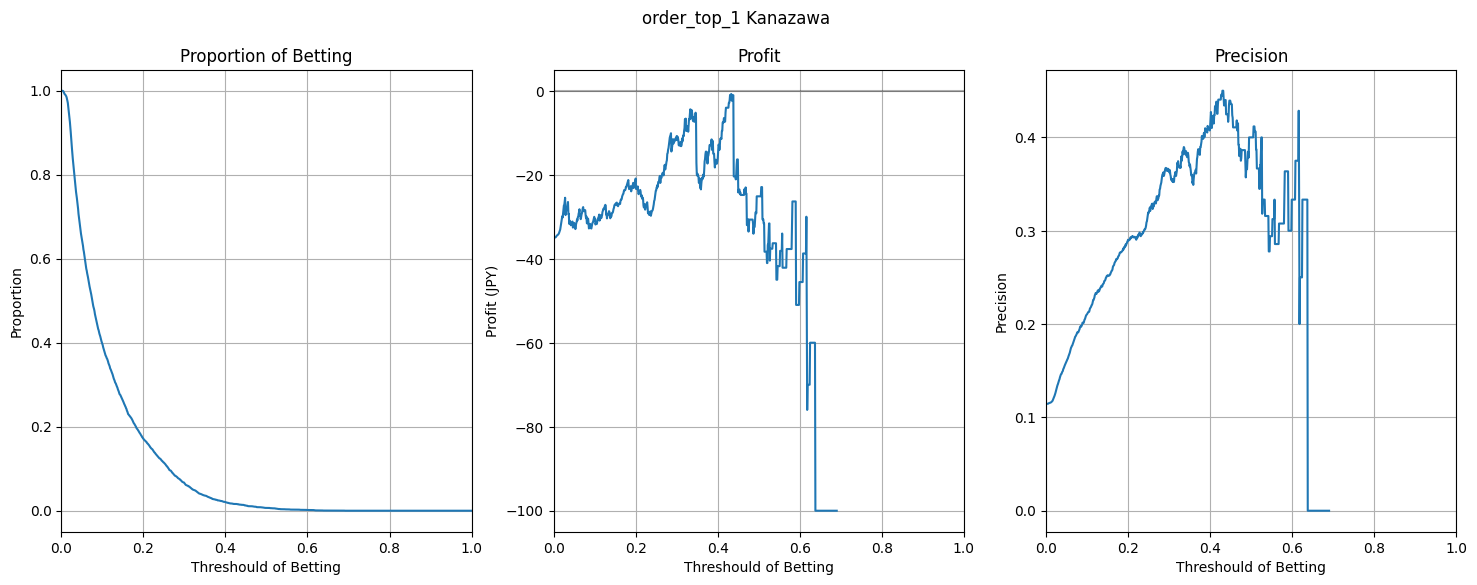

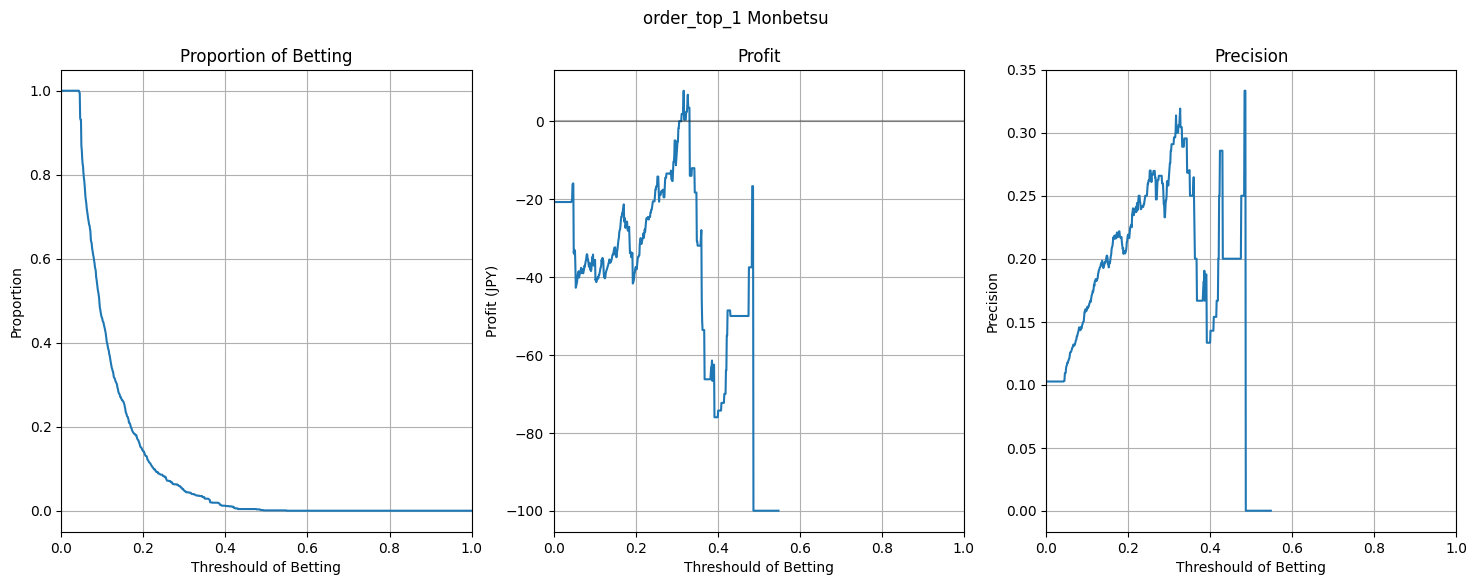

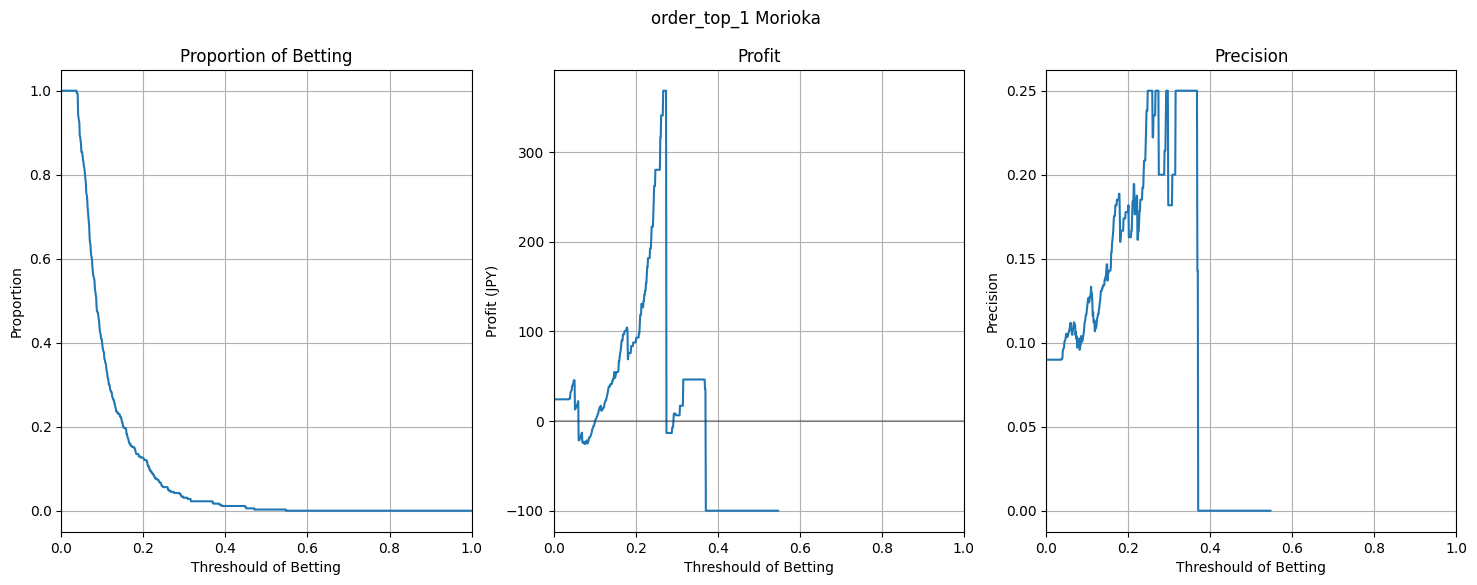

In [180]:
for place in horse_df2["place_name_en"].unique():
  print("============")
  print(place)
  train_df, test_df = split_df(horse_df2, place)
  y_test = test_df[y_var]
  model_place = create_model(train_df, test_df, X_var, y_var)

  y_pred_score = model_place.predict_proba(test_df[X_var])
  y_pred_class = model_place.predict(test_df[X_var])

  result_df = pd.DataFrame(y_pred_score, columns = ["score_0", "score_1"])
  result_df["y_true"] = test_df[y_var].reset_index(drop = True)
  result_df["y_pred_class"] = y_pred_class
  result_df["tansho_odds"] = test_df["tansho"].reset_index(drop = True)
  result_df["race_date"] = test_df["race_date"].reset_index(drop = True)
  result_df["race_id"] = test_df["race_id"].reset_index(drop = True)
  result_df["place_name_en"] = test_df["place_name_en"].reset_index(drop = True)
  result_df["arrival_order"] = test_df["arrival_order"].reset_index(drop = True)
  result_df["arrival_time"] = test_df["arrival_time3"].reset_index(drop = True)
  result_df["pred_score_order"] = result_df.groupby(["race_date", "race_id", "place_name_en"])["score_1"].rank(ascending=False, method = "min")

  prof_list = []
  for thd_i in range(1001):
    thd = 0.001 * thd_i
    bet_df = result_df[result_df["score_1"] > thd]
    prof = (bet_df["y_true"] * bet_df["tansho_odds"] * 100 - 100).mean()
    precision = bet_df["y_true"].mean()
    prop = bet_df["y_true"].count() / result_df["y_true"].count()
    prof_list.append([thd, prop, precision, prof])

  prof_df = pd.DataFrame(prof_list, columns = ["thd", "prop", "precision", "prof"])

  fig, ax = plt.subplots(1, 3, figsize = (18, 6))
  fig.suptitle("{} {}".format(y_var, place))

  ax[0].plot(prof_df["thd"], prof_df["prop"])
  ax[0].grid()
  ax[0].set_xlim([0, 1])
  ax[0].set_title("Proportion of Betting")
  ax[0].set_xlabel("Threshould of Betting")
  ax[0].set_ylabel("Proportion")

  ax[1].plot(prof_df["thd"], prof_df["prof"])
  ax[1].hlines(0, xmin = 0, xmax = 1, color = "black", alpha = 0.3)
  ax[1].grid()
  ax[1].set_xlim([0, 1])
  ax[1].set_title("Profit")
  ax[1].set_xlabel("Threshould of Betting")
  ax[1].set_ylabel("Profit (JPY)")


  ax[2].plot(prof_df["thd"], prof_df["precision"])
  ax[2].grid()
  ax[2].set_xlim([0, 1])
  ax[2].set_title("Precision")
  ax[2].set_xlabel("Threshould of Betting")
  ax[2].set_ylabel("Precision")

  fig.savefig("/content/MyDrive/MyDrive/horse/fig/threshold/threshold_{}.png".format(place))
  print("---threshold---")
  print('confusion matrix = \n', confusion_matrix(y_true = y_test, y_pred = y_pred_class))
  print('accuracy = ',accuracy_score(y_true = y_test, y_pred = y_pred_class))
  print('precision = ',precision_score(y_true = y_test, y_pred = y_pred_class))
  print('recall = ',recall_score(y_true = y_test, y_pred = y_pred_class))
  print('f1 score = ',f1_score(y_true = y_test, y_pred = y_pred_class))
  print("---top in race---")

  result_df["bet"] = ((result_df["pred_score_order"] <= 1)) * 1
  result_df["prof"] = result_df["bet"] * (100 * result_df["tansho_odds"] * result_df["y_true"] - 100)

  prof_df = result_df.groupby(["race_date", "race_id", "place_name_en"])["prof"].sum().reset_index()
  print("Expected Profit per Race:", result_df["prof"].mean())

  y_test = result_df["y_true"]
  y_pred_class = result_df["bet"]
  print('confusion matrix = \n', confusion_matrix(y_true = y_test, y_pred = y_pred_class))
  print('accuracy = ',accuracy_score(y_true = y_test, y_pred = y_pred_class))
  print('precision = ',precision_score(y_true = y_test, y_pred = y_pred_class))
  print('recall = ',recall_score(y_true = y_test, y_pred = y_pred_class))
  print('f1 score = ',f1_score(y_true = y_test, y_pred = y_pred_class))

In [ ]:
test_df2 = pd.concat([test_df.reset_index(drop = True), result_df.reset_index(drop = True)], axis = 1)

In [133]:
result_df

,score_0,score_1,y_true,tansho_odds,race_date
0,0.946396,0.053604,1,2.3,2023-06-08
1,0.885236,0.114764,0,10.6,2023-06-08
2,0.959325,0.040675,0,7.8,2023-06-08
3,0.971946,0.028054,0,33.3,2023-06-08
4,0.857971,0.142029,0,4.4,2023-06-08
...,...,...,...,...,...
3026,0.952505,0.047495,0,30.5,2023-12-31
3027,0.966999,0.033001,0,131.4,2023-12-31
3028,0.960550,0.039450,0,161.2,2023-12-31
3029,0.857919,0.142081,0,8.0,2023-12-31


(0.0, 100.0)

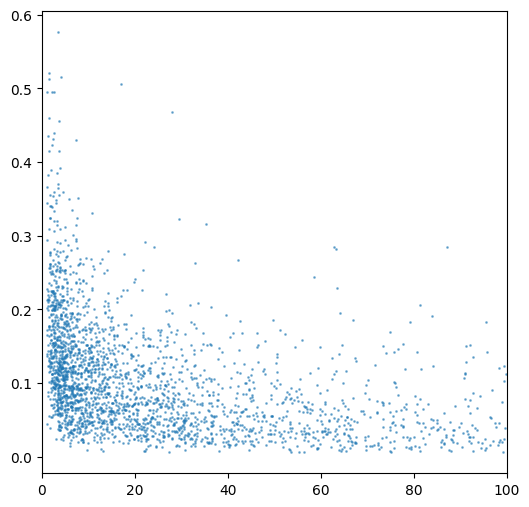

In [134]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(result_df["tansho_odds"], result_df["score_1"], s = 1, alpha = 0.5)
ax.set_xlim([0, 100])

<Axes: xlabel='score_1', ylabel='Count'>

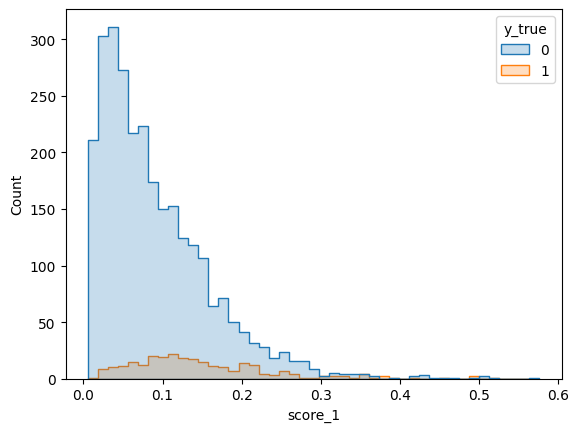

In [135]:
sns.histplot(data=result_df, x="score_1", hue="y_true", element="step")

In [ ]:
print('confusion matrix = \n', confusion_matrix(y_true = y_test, y_pred = y_pred_class))
print('accuracy = ',accuracy_score(y_true = y_test, y_pred = y_pred_class))
print('precision = ',precision_score(y_true = y_test, y_pred = y_pred_class))
print('recall = ',recall_score(y_true = y_test, y_pred = y_pred_class))
print('f1 score = ',f1_score(y_true = y_test, y_pred = y_pred_class))

confusion matrix = 
 [[31760   340]
 [ 2844   566]]
accuracy =  0.9103351168684878
precision =  0.6247240618101545
recall =  0.16598240469208211
f1 score =  0.26227988878591285


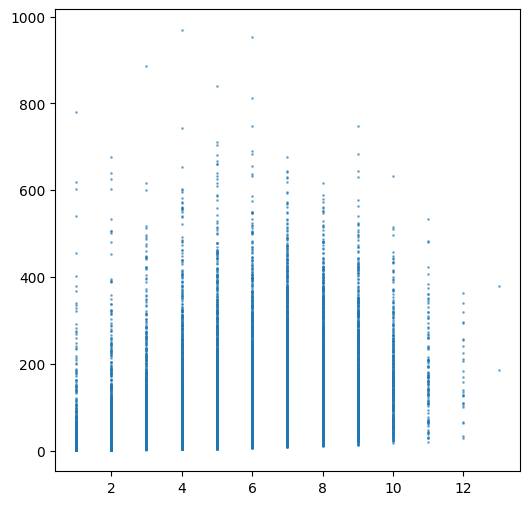

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(result_df["pred_score_order"], result_df["tansho_odds"], s = 1, alpha = 0.5)

In [ ]:
result_df[["race_date", "race_id", "place_name_en", "score_1", "pred_score_order", "arrival_order", "tansho_odds"]].tail(15)

,race_date,race_id,place_name_en,score_1,pred_score_order,arrival_order,tansho_odds
35495,2023-12-31,11,Sonoda,0.035952,5.0,4.0,32.0
35496,2023-12-31,11,Sonoda,0.201725,2.0,5.0,3.3
35497,2023-12-31,11,Sonoda,0.349491,1.0,6.0,1.5
35498,2023-12-31,11,Sonoda,0.003404,6.0,7.0,212.6
35499,2023-12-31,12,Oi,0.305766,2.0,1.0,2.7
35500,2023-12-31,12,Oi,0.454388,1.0,2.0,2.4
35501,2023-12-31,12,Oi,0.116108,3.0,3.0,9.6
35502,2023-12-31,12,Oi,0.020872,9.0,4.0,65.8
35503,2023-12-31,12,Oi,0.043307,7.0,6.0,15.8
35504,2023-12-31,12,Oi,0.020963,8.0,7.0,33.3


In [168]:
result_df["bet"] = ((result_df["pred_score_order"] <= 1)) * 1
result_df["prof"] = result_df["bet"] * (100 * result_df["tansho_odds"] * result_df["y_true"] - 100)

prof_df = result_df.groupby(["race_date", "race_id", "place_name_en"])["prof"].sum().reset_index()
result_df["prof"].mean()

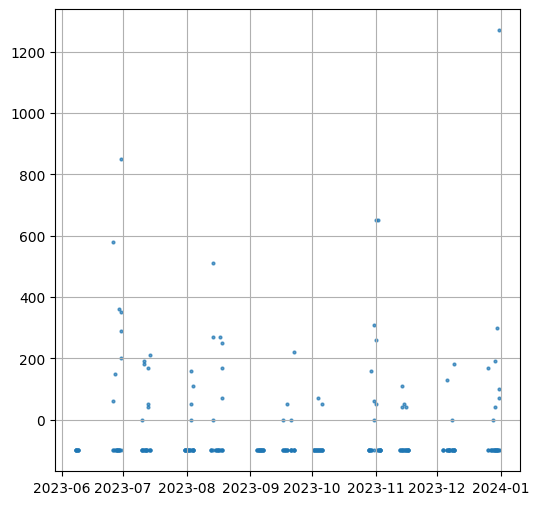

In [170]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(prof_df["race_date"], prof_df["prof"], s = 4, alpha = 0.7)
ax.grid()

In [179]:
y_test = result_df["y_true"]
y_pred_class = result_df["bet"]
print('confusion matrix = \n', confusion_matrix(y_true = y_test, y_pred = y_pred_class))
print('accuracy = ',accuracy_score(y_true = y_test, y_pred = y_pred_class))
print('precision = ',precision_score(y_true = y_test, y_pred = y_pred_class))
print('recall = ',recall_score(y_true = y_test, y_pred = y_pred_class))
print('f1 score = ',f1_score(y_true = y_test, y_pred = y_pred_class))

confusion matrix = 
 [[2559  209]
 [ 216   47]]
accuracy =  0.859782250082481
precision =  0.18359375
recall =  0.17870722433460076
f1 score =  0.1811175337186898


(-120.0, 500.0)

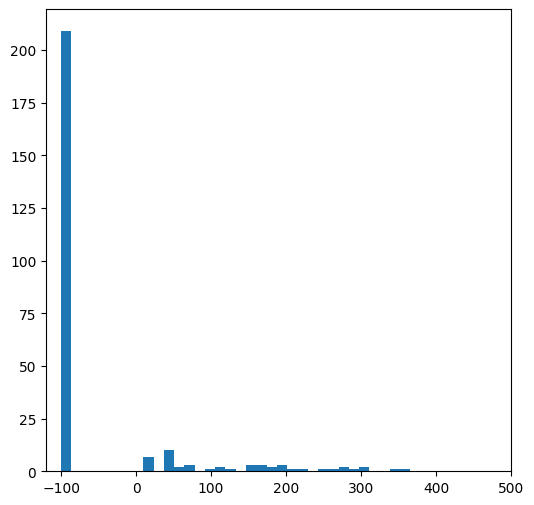

In [162]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.hist(prof_df["prof"], bins = 100)
ax.set_xlim([-120, 500])

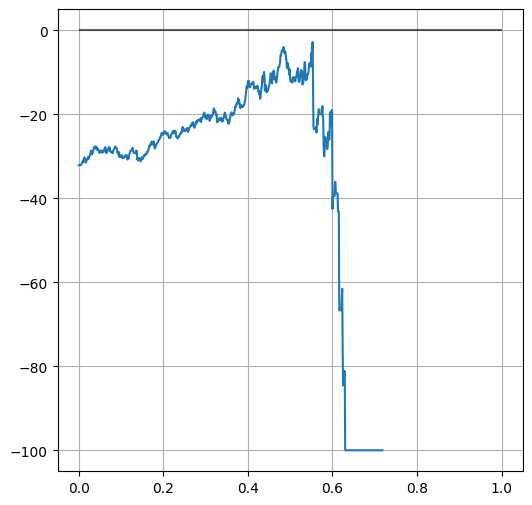

In [ ]:
result_df2 = result_df[result_df["tansho_odds"] > 1]
prof_list = []
for thd_i in range(1001):
  thd = 0.001 * thd_i
  bet_df = result_df2[result_df2["score_1"] > thd]
  prof = (bet_df["y_true"] * bet_df["tansho_odds"] * 100 - 100).mean()
  precision = bet_df["y_true"].mean()
  prop = bet_df["y_true"].count() / result_df2["y_true"].count()
  prof_list.append([thd, prop, precision, prof])
prof_df = pd.DataFrame(prof_list, columns = ["thd", "prop", "precision", "prof"])

fig, ax = plt.subplots(figsize = (6, 6))
ax.plot(prof_df["thd"], prof_df["prof"])
ax.hlines(0, xmin = 0, xmax = 1, color = "black", alpha = 0.6)
ax.grid()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true=result_df["y_true"],y_score=result_df["score_1"])
fpr_tpr_thresholds_df = pd.DataFrame([fpr,tpr,thresholds])
fpr_tpr_thresholds_df.T

,0,1,2
0,0.000000,0.000000,1.900779
1,0.000000,0.000293,0.900779
2,0.000000,0.000880,0.869167
3,0.000031,0.000880,0.852993
4,0.000031,0.001173,0.848197
...,...,...,...
8127,0.998069,0.999707,0.003364
8128,0.998162,0.999707,0.003361
8129,0.999408,0.999707,0.003343
8130,0.999502,0.999707,0.003341


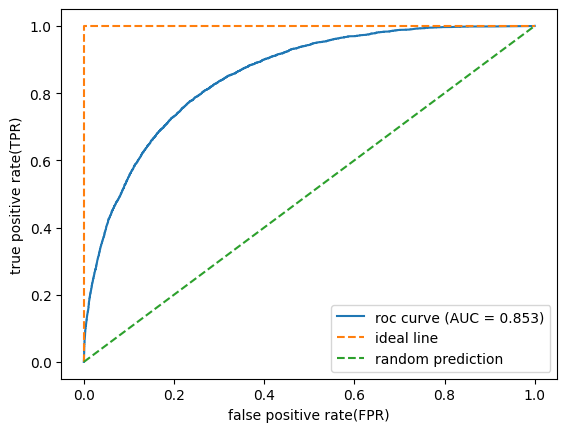

In [ ]:
plt.plot(fpr,tpr,label='roc curve (AUC = %0.3f)' % auc(fpr,tpr))
plt.plot([0,0,1], [0,1,1], linestyle='--', label='ideal line')
plt.plot([0, 1], [0, 1], linestyle='--', label='random prediction')
plt.legend()
plt.xlabel('false positive rate(FPR)')
plt.ylabel('true positive rate(TPR)')
plt.show()

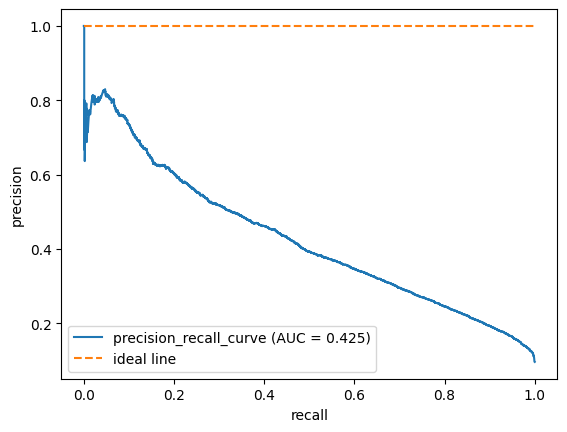

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_true=result_df["y_true"], probas_pred=result_df["score_1"])
plt.plot(recall,precision,label='precision_recall_curve (AUC = %0.3f)' % auc(recall,precision))
plt.plot([0,1], [1,1], linestyle='--', label='ideal line')
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

## Predict Tansho Odds

In [ ]:
model = XGBRegressor(early_stopping_rounds=10)

y_var = 'arrival_order'
X_train = train_df[X_var].values
X_test = test_df[X_var].values
y_train = train_df[y_var].values
y_test = test_df[y_var].values

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:2.80802
[1]	validation_0-rmse:2.63926
[2]	validation_0-rmse:2.55063
[3]	validation_0-rmse:2.50588
[4]	validation_0-rmse:2.48356
[5]	validation_0-rmse:2.47237
[6]	validation_0-rmse:2.46652
[7]	validation_0-rmse:2.46376
[8]	validation_0-rmse:2.46170
[9]	validation_0-rmse:2.46082
[10]	validation_0-rmse:2.46007
[11]	validation_0-rmse:2.45985
[12]	validation_0-rmse:2.45935
[13]	validation_0-rmse:2.45884
[14]	validation_0-rmse:2.45856
[15]	validation_0-rmse:2.45833
[16]	validation_0-rmse:2.45809
[17]	validation_0-rmse:2.45760
[18]	validation_0-rmse:2.45749
[19]	validation_0-rmse:2.45729
[20]	validation_0-rmse:2.45736
[21]	validation_0-rmse:2.45723
[22]	validation_0-rmse:2.45712
[23]	validation_0-rmse:2.45706
[24]	validation_0-rmse:2.45683
[25]	validation_0-rmse:2.45689
[26]	validation_0-rmse:2.45683
[27]	validation_0-rmse:2.45685
[28]	validation_0-rmse:2.45732
[29]	validation_0-rmse:2.45738
[30]	validation_0-rmse:2.45737
[31]	validation_0-rmse:2.45703
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

<BarContainer object of 80 artists>

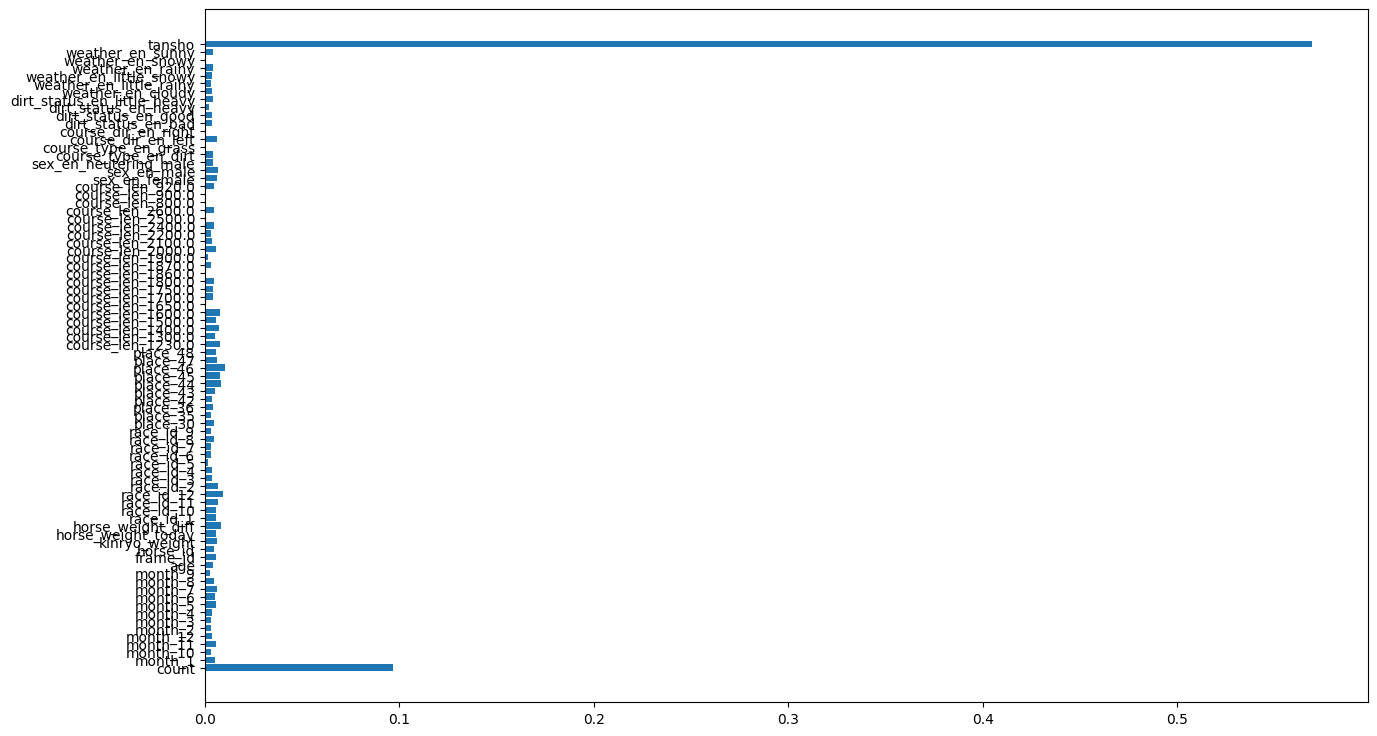

In [ ]:
model.feature_importances_
fig, ax = plt.subplots(figsize = (15, 9))
ax.barh(X_var, model.feature_importances_)

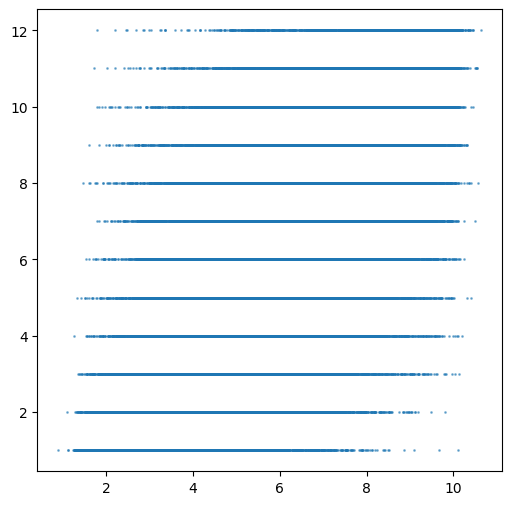

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(y_pred, test_df["arrival_order"], s = 1, alpha = 0.5)

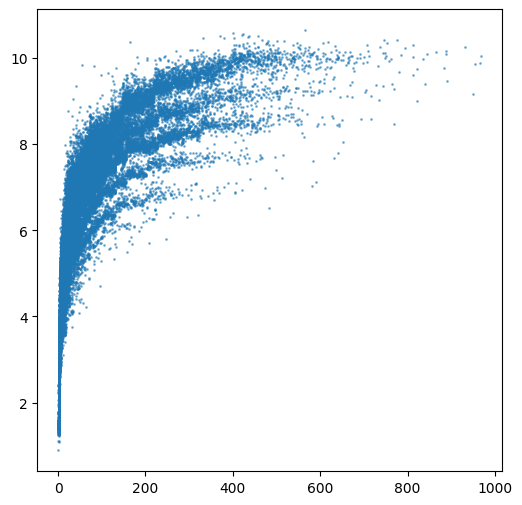

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(result_df["tansho_odds"], y_pred, s = 1, alpha = 0.5)

In [ ]:
result_df = test_df[["tansho", "arrival_order"]]

,race_date,count,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,...,weather_en_little_snowy,weather_en_rainy,weather_en_snowy,weather_en_sunny,arrival_time3,arrival_order,order_top_1,order_top_2,order_top_3,tansho
246108,2022-08-16,9,0,0,0,0,0,0,0,0,...,0,0,0,1,110.9,2.0,0,1,1,7.6
246109,2022-08-16,9,0,0,0,0,0,0,0,0,...,0,0,0,1,112.1,3.0,0,0,1,28.1
246110,2022-08-16,9,0,0,0,0,0,0,0,0,...,0,0,0,1,112.9,4.0,0,0,0,7.8
246111,2022-08-16,9,0,0,0,0,0,0,0,0,...,0,0,0,1,112.9,5.0,0,0,0,7.8
246112,2022-08-16,9,0,0,0,0,0,0,0,0,...,0,0,0,1,113.1,6.0,0,0,0,47.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307525,2023-12-24,11,0,0,0,1,0,0,0,0,...,0,0,0,0,83.3,6.0,0,0,0,39.7
307526,2023-12-24,11,0,0,0,1,0,0,0,0,...,0,0,0,0,83.3,7.0,0,0,0,36.8
307527,2023-12-24,11,0,0,0,1,0,0,0,0,...,0,0,0,0,83.4,8.0,0,0,0,20.0
307528,2023-12-24,11,0,0,0,1,0,0,0,0,...,0,0,0,0,83.8,9.0,0,0,0,70.3


# Neural Net

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

In [ ]:
def create_model(metrics):
  optimizer = optimizers.SGD(learning_rate=0.1)
  model = Sequential()

  model.add(Dense(units = 60, activation = "relu", input_shape = (80, )))
  model.add(Dropout(0.2))
  model.add(Dense(units = 60, activation = "softmax"))
  model.add(Dropout(0.2))
  model.add(Dense(units = 1, activation = "sigmoid"))

  model.summary()

  model.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = [metrics])

  return model

In [ ]:
y_var = ["order_top_3"]
X_var = ["count",'month_1', 'month_10', 'month_11', 'month_12', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'age', 'frame_id', 'horse_id',  'kinryo_weight',  'horse_weight_today',
       'horse_weight_diff', 'race_id_1', 'race_id_10', 'race_id_11', 'race_id_12',
       'race_id_2', 'race_id_3', 'race_id_4', 'race_id_5', 'race_id_6',
       'race_id_7', 'race_id_8', 'race_id_9', 'place_30', 'place_35',
       'place_36', 'place_42', 'place_43', 'place_44', 'place_45', 'place_46',
       'place_47', 'place_48', 'course_len_1230.0', 'course_len_1300.0', 'course_len_1400.0',
       'course_len_1500.0', 'course_len_1600.0', 'course_len_1650.0',
       'course_len_1700.0', 'course_len_1750.0', 'course_len_1800.0',
       'course_len_1860.0', 'course_len_1870.0', 'course_len_1900.0',
       'course_len_2000.0', 'course_len_2100.0', 'course_len_2200.0',
       'course_len_2400.0', 'course_len_2500.0', 'course_len_2600.0',
       'course_len_800.0', 'course_len_900.0', 'course_len_920.0','sex_en_female', 'sex_en_male',
       'sex_en_neutering_male', 'course_type_en_dirt', 'course_type_en_grass',
       'course_dir_en_left', 'course_dir_en_right', 'dirt_status_en_bad',
       'dirt_status_en_good', 'dirt_status_en_heavy',
       'dirt_status_en_little_heavy', 'weather_en_cloudy',
       'weather_en_little_rainy', 'weather_en_little_snowy',
       'weather_en_rainy', 'weather_en_snowy', 'weather_en_sunny', "tansho"]

horse_df3 = horse_df3.dropna()
train_df, test_df = train_test_split(horse_df3, test_size = 0.2, shuffle = False)

In [ ]:
model_accuracy = create_model("accuracy")
history = model_accuracy.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose = 1, validation_data = (X_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 60)                4860      
                                                                 
 dropout_4 (Dropout)         (None, 60)                0         
                                                                 
 dense_7 (Dense)             (None, 60)                3660      
                                                                 
 dropout_5 (Dropout)         (None, 60)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 61        
                                                                 
Total params: 8581 (33.52 KB)
Trainable params: 8581 (33.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
7589/7589

In [ ]:
score = model_accuracy.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: -1507408.0
Test accuracy: 0.0976923480629921


In [ ]:
y_pred = model_accuracy.predict(X_test)

1898/1898 [==============================] - 3s 2ms/step


In [ ]:
pd.DataFrame(y_pred)

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
60706,1.0
60707,1.0
60708,1.0
60709,1.0


In [ ]:
print('confusion matrix = \n', confusion_matrix(y_true = y_test, y_pred = y_pred_class))
print('accuracy = ',accuracy_score(y_true = y_test, y_pred = y_pred_class))
print('precision = ',precision_score(y_true = y_test, y_pred = y_pred_class))
print('recall = ',recall_score(y_true = y_test, y_pred = y_pred_class))
print('f1 score = ',f1_score(y_true = y_test, y_pred = y_pred_class))

246108    54.0
246109    56.0
246110    53.0
246111    53.0
246112    56.0
          ... 
307525    54.0
307526    56.0
307527    56.0
307528    54.0
307529    56.0
Name: kinryo_weight, Length: 60711, dtype: float64

In [ ]:
model_accuracy.predict(X_test)

1898/1898 [==============================] - 3s 1ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

(array([   67.,   243.,  2015.,  7962., 15948., 18372., 11226.,  3984.,
          790.,   104.]),
 array([331. , 356.9, 382.8, 408.7, 434.6, 460.5, 486.4, 512.3, 538.2,
        564.1, 590. ]),
 <BarContainer object of 10 artists>)

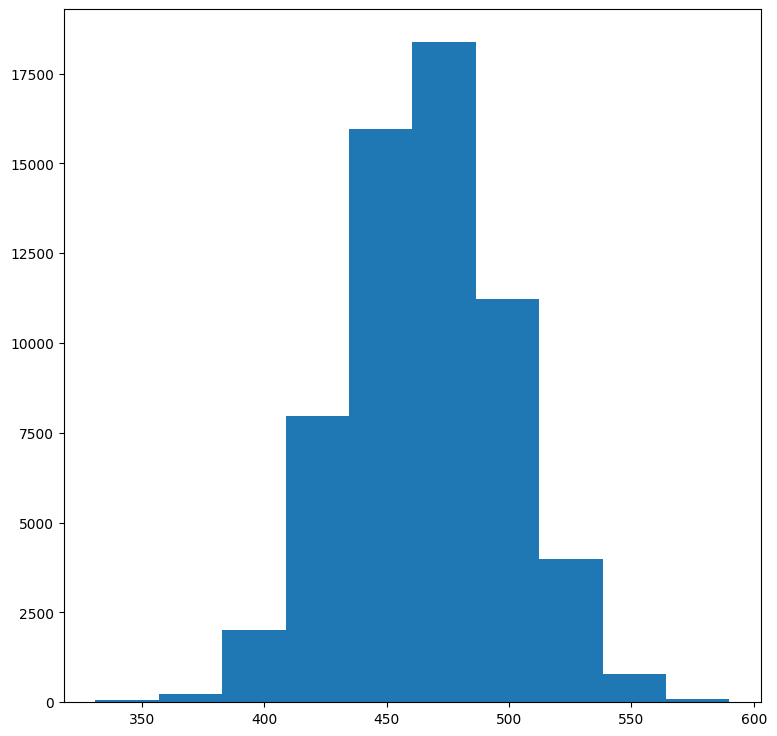

In [ ]:
fig, ax = plt.subplots(figsize = (9, 9))
ax.hist(test_df[X_var]["horse_weight_today"])

In [ ]:
y_pred = model_accuracy.predict(test_df[X_var])

1898/1898 [==============================] - 3s 1ms/step


In [ ]:
result_df = pd.DataFrame(y_pred, columns = ["score"])
result_df["y_true"] = y_test

In [ ]:
result_df

,score,y_true
0,1.0,2.0
1,1.0,3.0
2,1.0,4.0
3,1.0,5.0
4,1.0,6.0
...,...,...
60706,1.0,6.0
60707,1.0,7.0
60708,1.0,8.0
60709,1.0,9.0
